# Building SVM model to detect Breast Cancer.

In [35]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data = load_breast_cancer()

In [37]:
list(data.target_names)

['malignant', 'benign']

In [38]:
list(data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [39]:
X = data.data
y= data.target

In [40]:

X[0:30]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

# Standardize the features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [43]:
np.max(X1[:,0])

3.971287646545106

In [44]:
print(X1.shape)

(569, 30)


In [45]:
np.max(X1, axis=0)

array([ 3.97128765,  4.65188898,  3.97612984,  5.25052883,  4.77091122,
        4.56842498,  4.24358882,  3.92792966,  4.48475086,  4.91091929,
        8.90690934,  6.65527935,  9.46198577, 11.04184226,  8.02999927,
        6.14348219, 12.0726804 ,  6.64960079,  7.07191706,  9.85159257,
        4.09418939,  3.88590505,  4.28733746,  5.9301724 ,  3.95537411,
        5.11287727,  4.7006688 ,  2.68587702,  6.04604135,  6.84685604])

In [46]:
X= X1

Using k fold cross validation hence only splitting data into train and test.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

# Use sklearn  SVM . 



In [50]:
from sklearn import svm
clf = svm.LinearSVC() 
clf.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# Accuracy

In [51]:
clf.score(X_test, y_test)

0.9605263157894737

In [52]:
y_test_pred = clf.predict(X_test)

# Recall metric (true positive are recalled)

In [53]:
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score, f1_score, fbeta_score, classification_report

In [54]:

rec_score = recall_score(y_test,y_test_pred)
prec_score = precision_score(y_test,y_test_pred)
f_score = f1_score(y_test,y_test_pred)
print(rec_score,prec_score,f_score)

0.9594594594594594 0.9793103448275862 0.9692832764505119


In [55]:

f_beta = fbeta_score(y_test, y_test_pred, average='weighted', beta=0.6)
print(f_beta)

0.9608872248992211


# Kernel SVM using sklearn

In [56]:
hyper_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [58]:
clf = GridSearchCV(SVC(probability=True), hyper_parameters, cv=5,
                        verbose=10)

In [59]:
grid_search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.8985507246376812, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9565217391304348, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9411764705882353, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s



[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9402985074626866, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.7391304347826086, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6811594202898551, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6617647058823529, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.7205882352941176, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6716417910447762, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.8985507246376812, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9855072463768116, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ......... C=10, gamma=0.001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9852941176470589, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ......

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished


In [60]:
#uncomment for parallel execution.
#clf = GridSearchCV(SVC(probability=True), hyper_parameters, cv=5,scoring='accuracy', verbose=10, n_jobs=-1)

In [61]:
grid_search.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
grid_search.best_score_

0.9736070381231672

# Parameters selected by grid search.

In [63]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [64]:
grid_search.score(X_test, y_test)

0.9649122807017544

In [76]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        80
           1       0.98      0.96      0.97       148

   micro avg       0.96      0.96      0.96       228
   macro avg       0.95      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



# ROC Curve 

In [77]:
y_test_pred_prob = grid_search.predict_proba(X_test)

In [78]:
y_test_pred_prob.shape

(228, 2)

In [79]:
y_prob= grid_search.predict(X_test)

In [80]:
# Probability for the positive outcome
prob = y_test_pred_prob[:, 1]

In [85]:
FPR, TPR, THR = roc_curve(y_test, prob)

In [86]:
FPR, TPR, THR

(array([0.    , 0.    , 0.    , 0.0125, 0.0125, 0.025 , 0.025 , 0.0375,
        0.0375, 0.05  , 0.05  , 0.0625, 0.0625, 0.075 , 0.075 , 0.95  ,
        1.    ]),
 array([0.        , 0.00675676, 0.86486486, 0.86486486, 0.87162162,
        0.87162162, 0.93243243, 0.93243243, 0.95945946, 0.95945946,
        0.97972973, 0.97972973, 0.99324324, 0.99324324, 1.        ,
        1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 8.87083254e-01, 8.83954101e-01,
        8.81473901e-01, 8.77741997e-01, 8.08889551e-01, 7.78657795e-01,
        6.58731522e-01, 5.74956359e-01, 5.16480786e-01, 5.00000000e-01,
        4.43312693e-01, 4.34695012e-01, 3.33385274e-01, 2.18082197e-07,
        1.00000010e-07]))

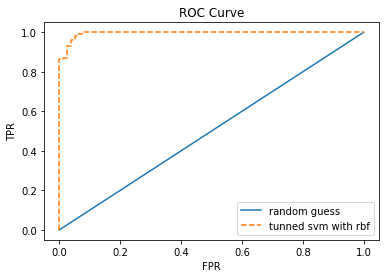

In [87]:
plt.plot([0, 1], [0, 1], label="random guess") # random model
plt.plot(FPR, TPR,  '--', label= "tunned svm with rbf")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()

# Area under the curve(AUC) for tunned SVM. 

In [88]:
from sklearn.metrics import auc
print(auc(FPR, TPR))
print(roc_auc_score(y_test,prob))

0.9950168918918919
0.9950168918918919
